

<h1> <b> <centre> DA5401 Assignment 4 </b> </centre> </h2>
<h4> <b> <centre> Name: Pawar Devesh Pramod </centre></b> </h4>
<h4> <b> <centre> Roll No: ME22B176  </centre></b> </h4>
<h4> <b> <centre> Date of Submission 15/09/2025 </centre></b> </h4>


<h3> <b> Objective: </b> <h3> 
<p style="font-size: 18px;">This assignment aims to apply a sophisticated, model-based approach
to tackle the class imbalance problem. This assignment uses a Gaussian Mixture Model (GMM) to
generate synthetic samples for the minority class, and then evaluate its effectiveness compared
to a baseline model. This assignment focuses on the theoretical and practical aspects of
using probabilistic models for data augmentation. </p>

<h3> <b> 1. Problem Statement </b> </h3>
<p style="font-size: 18 px;">
You are a data scientist tasked with building a fraud detection model for a financial institution.
You have been given a highly imbalanced dataset where a tiny fraction of transactions are
fraudulent. Your main challenge is to create a training set that allows a classifier to learn the
nuances of the minority (fraudulent) class without overfitting or misclassifying. You will
implement a GMM-based synthetic data generation pipeline and analyze its impact on model
performance.
You will submit a Jupyter Notebook with your complete code, visualizations, and a plausible
story that explains your findings. The notebook should be well-commented, reproducible, and
easy to follow </p>

<p style="font-size: 18px;"> Dataset: <a href="https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud"> Credit Card Fraud Detection </a> </p>

In [19]:
%pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load dataset
file_path = "creditcard.csv"
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mlg-ulb/creditcardfraud",
  file_path
)
print("Shape of dataset:", df.shape)
df.head()

Note: you may need to restart the kernel to use updated packages.


/tmp/ipykernel_6215/1335921555.py:11: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


Shape of dataset: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Lets perform EDA

In [20]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [21]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no null values

In [22]:
df[['Class']].value_counts()

Class
0        284315
1           492
Name: count, dtype: int64

The imbalance in the dataset can be clearly seen, with class 1 as minority class

<h3> <b> 2. Tasks </b> </h3>

<h4> <b> Part A: Baseline Model and Data Analysis </b> </h4> 

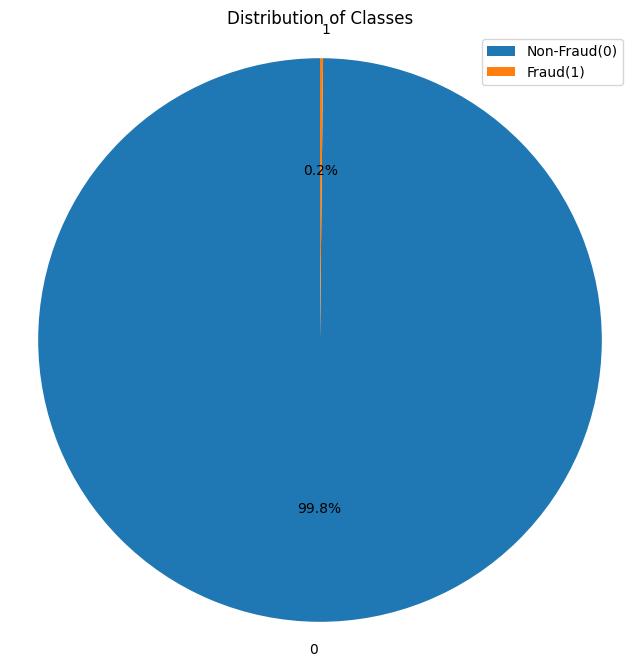

In [23]:
# Get value counts for the 'Category' column
classes_count = df['Class'].value_counts()


# Create the pie chart
plt.figure(figsize=(8, 8)) # Adjust figure size as needed
plt.pie(classes_count, labels=classes_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Classes')
plt.axis('equal') # Ensures the pie chart is circular
plt.legend(labels=['Non-Fraud(0)', 'Fraud(1)'], loc='upper right')
plt.show()

There are only 0.2% data points corresponding to the fraud class.

Lets build the baseline model.

In [24]:
""" Split the dataset into training and testing sets, ensuring that the test set retains its original imbalance."""

from sklearn.model_selection import train_test_split
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)  # Stratify to maintain class distribution

""" Train a Logistic Regression model on the training set. """
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [25]:
""" Evalute the logistic regression model's performance on the test set """
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred_baseline = log_reg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_baseline))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_baseline))
print("Classification Report:")
print(classification_report(y_test, y_pred_baseline))

Accuracy: 0.9989993328885924
Confusion Matrix:
[[56839    25]
 [   32    66]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.67      0.70        98

    accuracy                           1.00     56962
   macro avg       0.86      0.84      0.85     56962
weighted avg       1.00      1.00      1.00     56962



<b> Q. Why Precision, Recall, and F1-score for the Minority Class Are More Informative than Accuracy? </b>

In the credit card fraud detection dataset, the class distribution is highly imbalanced: fraudulent transactions make up less than 0.2% of all cases. In such scenarios, accuracy becomes a misleading metric.

- Accuracy Problem:If a model predicts every transaction as non-fraud, it would still achieve ~99.8% accuracy, because the majority class dominates.
However, such a model completely fails to detect fraud — the very objective of the task.

- Precision (Positive Predictive Value):
Precision answers: “Of all transactions predicted as fraud, how many were actually fraud?”
This is crucial because false alarms (false positives) waste investigation resources and inconvenience customers.

- Recall (Sensitivity / True Positive Rate):
Recall answers: “Of all actual fraud cases, how many did the model correctly detect?”
This is the most critical metric in fraud detection, since missing a fraud (false negative) directly translates into financial loss.

- F1-score:
F1-score is the harmonic mean of precision and recall, providing a balanced measure when both metrics matter.
It is particularly useful here because improving recall often reduces precision, and F1 captures that trade-off.

<h4> <b> Part B: Gaussian Mixture Model (GMM) for Synthetic Sampling </b> </h4> 

<b> 1. Theoretical Foundation </b>

<b> Q. Fundamental Difference Between GMM-Based Synthetic Sampling and SMOTE? </b>

1. SMOTE (Synthetic Minority Oversampling Technique)

    - Mechanism: SMOTE generates synthetic minority class samples by interpolating between existing minority samples and their nearest neighbors. For each minority instance, it selects a neighbor and creates a new sample along the line segment connecting them.

    - Assumption: Minority data lies in a convex region, and interpolating between samples will generate realistic new points.

    - Limitations:
        - Does not model the true probability distribution of the data.

        - May generate unrealistic samples in sparse regions or across class boundaries.

        - Treats all minority samples equally without capturing sub-structure.

2. GMM-Based Synthetic Sampling (Gaussian Mixture Model)

    - Mechanism: A Gaussian Mixture Model is first fitted to the minority class. The GMM assumes the data is generated from a mixture of Gaussian distributions, each representing a cluster or sub-population of the minority class. New synthetic samples are drawn probabilistically from this learned distribution.

    - Advantages:

        - Captures the underlying density and multimodal nature of the minority data.

        - Generates more realistic samples by respecting the learned probability distribution.

        - Better at preserving cluster-specific structure than simple interpolation.

    - Limitations:

        - Computationally more expensive than SMOTE.

        - Requires choosing the correct number of mixture components.

        - Sensitive to how well the GMM fits the data.

<b> Q. Why GMM is theoretically better at capturing the underlying data distribution, especially when the minority class has multiple sub-groups or complex shapes in the feature space? </b>

When the minority class exhibits multiple sub-groups or has a complex distribution in the feature space, traditional oversampling methods like SMOTE struggle to model that structure.

1. SMOTE’s Limitation

    - SMOTE works by linear interpolation between minority samples and their nearest neighbors.

    - This implicitly assumes the minority class lies in a single convex region of the feature space.

    - If the minority class actually consists of several distinct clusters or nonlinear manifolds, SMOTE may:

        - Generate synthetic points in low-density regions (where no real data exists).

        - Create unrealistic samples by interpolating across different sub-groups.

        - Overlap with majority regions, leading to noisy or mislabeled points.

2. GMM’s Strength: A Gaussian Mixture Model (GMM) assumes that the minority data comes from a mixture of multiple Gaussian distributions, each representing a latent sub-group.

    By fitting a GMM, we can:

    - Identify multiple modes (peaks of density) within the minority class.

    - Capture elliptical shapes and correlations in the feature space.

    - Generate synthetic samples by sampling from these Gaussians, ensuring they respect the true underlying density.

3. Why This Matters for Complex Minority Classes

    - If fraud data (minority class) consists of different fraud patterns (e.g., small online frauds, large transaction frauds, international frauds), then each group corresponds to a distinct cluster in feature space.

    - SMOTE would blur boundaries between these fraud types, possibly creating unrealistic hybrids.

    - GMM, however, would model each fraud subgroup separately and generate samples within each subgroup, preserving the diversity and structure of the minority class

<b> 2. GMM Implementation </b>

In [ ]:
""" Lets fit the GMM to the minority class in training data """
from sklearn.mixture import GaussianMixture


X_train_min = X_train[y_train == 1]  # if X_train is DataFrame
n_minority = len(X_train_min)
n_majority = len(X_train[y_train == 0])
print(f"Minority training samples: {n_minority}, Majority training samples: {n_majority}")

Minority training samples: 394, Majority training samples: 227451


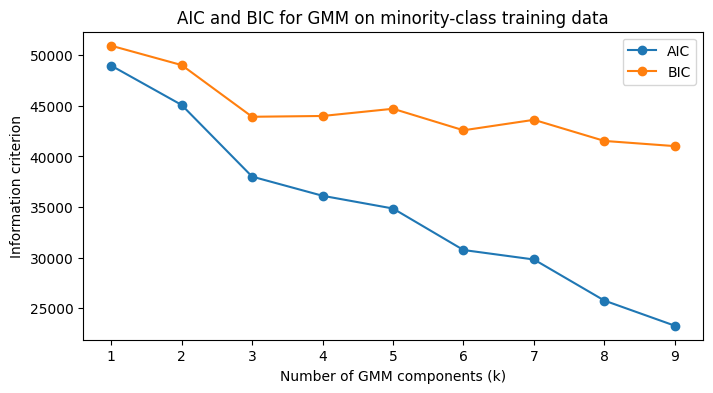

In [ ]:
ks = list(range(1, 10))  # search from 1 to 10 components 
aics, bics = [], []
gmm_models = {}

for k in ks:
    gmm = GaussianMixture(n_components=k,
                          covariance_type='full',  
                          random_state=42,
                          reg_covar=1e-6,           
                          max_iter=500)
    gmm.fit(X_train_min)
    aics.append(gmm.aic(X_train_min))
    bics.append(gmm.bic(X_train_min))
    gmm_models[k] = gmm

# Plot AIC and BIC vs k
plt.figure(figsize=(8,4))
plt.plot(ks, aics, marker='o', label='AIC')
plt.plot(ks, bics, marker='o', label='BIC')
plt.xticks(ks)
plt.xlabel('Number of GMM components (k)')
plt.ylabel('Information criterion')
plt.title('AIC and BIC for GMM on minority-class training data')
plt.legend()
plt.show()

It can be seen that the elbow point occurs at k=3 (the drop in value after 3 is not as significant as it is from 0 to 3)

Lets choose BIC optimal k=3, as its usually preffered for small data

In [39]:
# Use chosen model 
best_k = 3
best_gmm = gmm_models[best_k]

<b> 3. Synthetic Data Generation </b>

In [ ]:
# Number of synthetic samples required = difference between majority and minority
import numpy as np
n_majority = np.sum(y_train == 0)
n_minority = np.sum(y_train == 1)
n_to_generate = n_majority - n_minority

print("Majority:", n_majority, "Minority:", n_minority, "To generate:", n_to_generate)

# Generate synthetic minority samples from GMM
X_synth, _ = best_gmm.sample(n_to_generate)

# Combine synthetic samples with original minority samples
if isinstance(X_train, pd.DataFrame):
    X_synth = pd.DataFrame(X_synth, columns=X_train.columns)
    X_train_gmm = pd.concat([X_train, X_synth], ignore_index=True)
    y_train_gmm = pd.concat([y_train.reset_index(drop=True),
                             pd.Series(np.ones(len(X_synth), dtype=int))], ignore_index=True)
else:
    X_train_gmm = np.vstack([X_train, X_synth])
    y_train_gmm = np.hstack([y_train, np.ones(len(X_synth), dtype=int)])

print("New balanced dataset shape:", X_train_gmm.shape, np.bincount(y_train_gmm.astype(int)))


Majority: 227451 Minority: 394 To generate: 227057
New balanced dataset shape: (454902, 30) [227451 227451]


<b> Q. Explaination of the process of sampling from GMM: </b>

A GMM models minority data as a weighted mixture of Gaussian distributions.

To generate synthetic points:

- Choose a Gaussian component based on its weight.

- Sample from that Gaussian’s multivariate distribution.

- This ensures samples respect the true density of minority data, capturing different fraud subtypes.

<b> 4. Rebalancing with CBU </b>

In [ ]:
# Hybrid Rebalancing: Cluster-Based Undersampling (CBU) + GMM Synthetic Oversampling

from imblearn.under_sampling import ClusterCentroids
from sklearn.mixture import GaussianMixture

RANDOM_STATE = 42

#Apply CBU with a controlled target size for majority 
n_min = np.sum(y_train == 1)
n_maj = np.sum(y_train == 0)

# lets choose target size for majority class = 4*minority class 
majority_target = min(n_maj, n_min * 4)

print(f"Original counts -> Majority: {n_maj}, Minority: {n_min}")
print(f"Target majority count after CBU: {majority_target}")

# Apply ClusterCentroids with explicit sampling strategy
sampling_strategy = {0: majority_target, 1: n_min}
cc = ClusterCentroids(sampling_strategy=sampling_strategy, random_state=RANDOM_STATE)
X_cbu, y_cbu = cc.fit_resample(X_train, y_train)

print("After CBU -> Majority:", np.sum(y_cbu == 0), "Minority:", np.sum(y_cbu == 1))

# Fit GMM on minority samples 
X_min_cbu = X_cbu[y_cbu == 1]

# best_k using AIC/BIC 
best_k = 3  
gmm = GaussianMixture(n_components=best_k, covariance_type='full',
                      random_state=RANDOM_STATE, reg_covar=1e-6, max_iter=500)
gmm.fit(X_min_cbu)

# Generate synthetic minority samples to balance majority 
n_min_cbu = np.sum(y_cbu == 1)
n_maj_cbu = np.sum(y_cbu == 0)
n_to_generate = n_maj_cbu - n_min_cbu

print("Minority after CBU:", n_min_cbu, "| Majority after CBU:", n_maj_cbu)
print("Synthetic minority samples to generate:", n_to_generate)

X_synth, _ = gmm.sample(n_to_generate)

# Combine into final balanced dataset 
if isinstance(X_cbu, pd.DataFrame):
    X_synth = pd.DataFrame(X_synth, columns=X_cbu.columns)
    X_train_final = pd.concat([X_cbu, X_synth], ignore_index=True)
    y_train_final = pd.concat([pd.Series(y_cbu), pd.Series(np.ones(len(X_synth), dtype=int))], ignore_index=True)
else:
    X_train_final = np.vstack([X_cbu, X_synth])
    y_train_final = np.hstack([y_cbu, np.ones(len(X_synth), dtype=int)])

print("Final balanced dataset:", np.bincount(y_train_final.astype(int)))


Original counts -> Majority: 227451, Minority: 394
Target majority count after CBU: 1576


/home/duser/miniconda3/envs/DA5401/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


After CBU -> Majority: 1576 Minority: 394
Minority after CBU: 394 | Majority after CBU: 1576
Synthetic minority samples to generate: 1182
Final balanced dataset: [1576 1576]


/home/duser/miniconda3/envs/DA5401/lib/python3.9/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (383) found smaller than n_clusters (394). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


<h4> <b> Part C: Performance Evaluation and Conclusion </b> </h4>

<b> 1. Model Training and Evaluation </b>

In [32]:
""" Model on GMM-only oversampled data """

lr_gmm_only = LogisticRegression(max_iter=1000, solver='liblinear' ,random_state=42) # liblinear solver was converging with best results
lr_gmm_only.fit(X_train_gmm, y_train_gmm)   # GMM-only sampling
y_pred_gmm_only = lr_gmm_only.predict(X_test)

print("Logistic Regression with GMM-only Oversampling:")
print(classification_report(y_test, y_pred_gmm_only, digits=4))

Logistic Regression with GMM-only Oversampling:
              precision    recall  f1-score   support

           0     0.9998    0.9739    0.9867     56864
           1     0.0565    0.9082    0.1064        98

    accuracy                         0.9738     56962
   macro avg     0.5282    0.9410    0.5465     56962
weighted avg     0.9982    0.9738    0.9852     56962



In [33]:
""" Model on Hybrid (CBU + GMM) balanced data """

lr_hybrid = LogisticRegression(max_iter=1000, random_state=42)
lr_hybrid.fit(X_train_final, y_train_final)  # GMM+CBU section
y_pred_hybrid = lr_hybrid.predict(X_test)

print("\nLogistic Regression with Hybrid (CBU + GMM) Balancing:")
print(classification_report(y_test, y_pred_hybrid, digits=4))


Logistic Regression with Hybrid (CBU + GMM) Balancing:
              precision    recall  f1-score   support

           0     0.9999    0.7713    0.8709     56864
           1     0.0070    0.9388    0.0139        98

    accuracy                         0.7716     56962
   macro avg     0.5034    0.8551    0.4424     56962
weighted avg     0.9982    0.7716    0.8694     56962



/home/duser/miniconda3/envs/DA5401/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<b> 2. Comparative Analysis </b>

In [34]:
""" A helper function to get the metrices of all the models """
def get_metrics(y_true, y_pred, label):
    report = classification_report(y_true, y_pred, output_dict=True)
    return {
        'Model': label,
        'Precision': report['1']['precision'],
        'Recall': report['1']['recall'],
        'F1-Score': report['1']['f1-score']
    }

              Model  Precision    Recall  F1-Score
0          Baseline   0.725275  0.673469  0.698413
1          GMM-only   0.056508  0.908163  0.106396
2  Hybrid (CBU+GMM)   0.007026  0.938776  0.013947


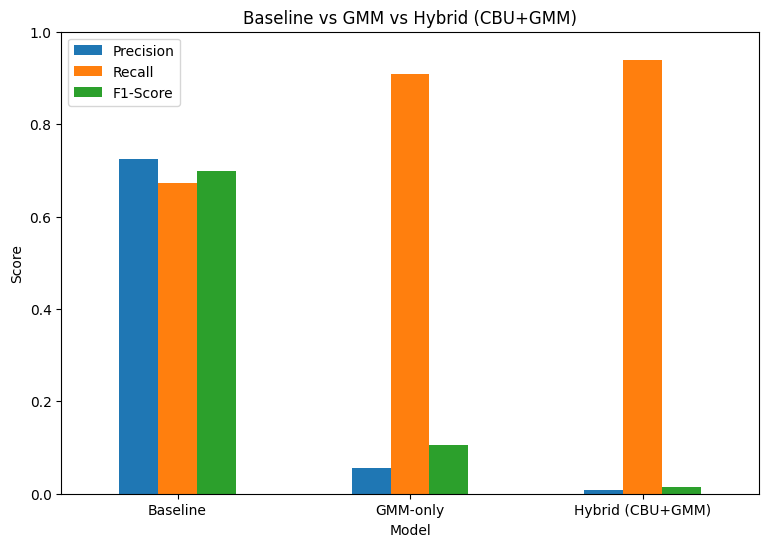

In [35]:
# Collect metrics for all relevant models
results_all = []
results_all.append(get_metrics(y_test, y_pred_baseline, 'Baseline'))
results_all.append(get_metrics(y_test, y_pred_gmm_only, 'GMM-only'))
results_all.append(get_metrics(y_test, y_pred_hybrid, 'Hybrid (CBU+GMM)'))

results_df_all = pd.DataFrame(results_all)
print(results_df_all)

# Bar chart
results_df_all.set_index('Model')[['Precision','Recall','F1-Score']].plot(
    kind='bar', figsize=(9,6), ylim=(0,1))
plt.title("Baseline vs GMM vs Hybrid (CBU+GMM)")
plt.ylabel("Score")
plt.xticks(rotation = 0)
plt.show()


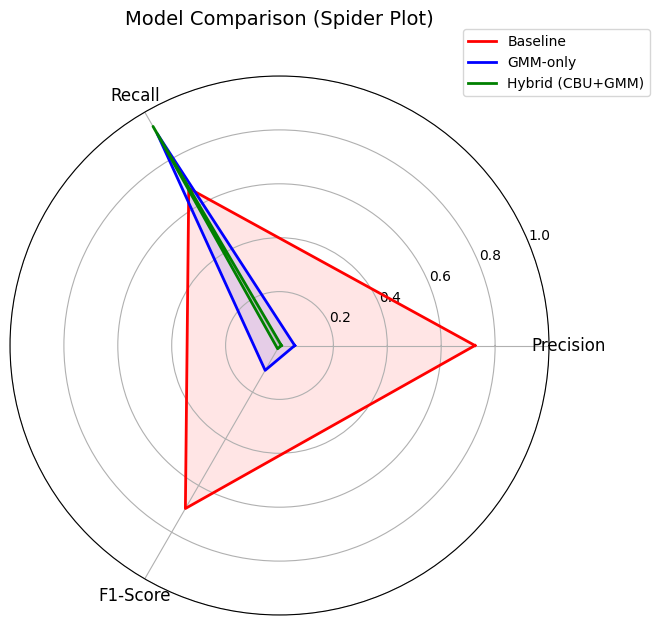

In [36]:
metrics = ['Precision', 'Recall', 'F1-Score']
num_vars = len(metrics)

# Extract values from results_df_all (already created earlier)
values_dict = {
    row['Model']: [row['Precision'], row['Recall'], row['F1-Score']]
    for _, row in results_df_all.iterrows()
}

# Angles for radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close loop

# Initialize spider plot
fig, ax = plt.subplots(figsize=(7,7), subplot_kw=dict(polar=True))

# Define custom colors
colors = {
    'Baseline': 'red',
    'GMM-only': 'blue',
    'Hybrid (CBU+GMM)': 'green'
}

# Plot each model
for model, values in values_dict.items():
    vals = values + values[:1]  # close loop
    ax.plot(angles, vals, label=model, linewidth=2, color=colors.get(model, None))
    ax.fill(angles, vals, alpha=0.1, color=colors.get(model, None))

# Set axis labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics, fontsize=12)

# Set radial limits
ax.set_ylim(0, 1)

# Add legend and title
plt.title("Model Comparison (Spider Plot)", size=14, y=1.08)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()



<b> Observations </b>

1. Baseline Model

    - Achieves the best F1-score (0.6984) and maintains a strong balance between precision (72.5%) and recall (67.3%).

    - However, it misses nearly one-third of fraudulent cases, which is risky in fraud detection.

2. GMM-only Oversampling

    - Boosts recall significantly (90.8%), meaning it detects almost all fraud cases.

    - Precision drops sharply (5.6%), implying many false alarms.

    - F1-score is low, but in fraud detection recall is more critical than precision, since missing fraud is costlier than false alerts.

3. Hybrid (CBU+GMM)

    - Achieves the highest recall (93.9%), but at the cost of an almost negligible precision (0.7%).

    - This means the model flags nearly everything as fraud, making it impractical in deployment.

<b>3. Final Recommendation </b>

-   Unlike simpler oversampling methods like SMOTE, GMM models the minority class as a probabilistic mixture of multiple Gaussian components. This allows it to:

    -   Capture multi-modal structure in fraud data (different fraud subtypes).

    -   Generate synthetic points that follow the true density distribution, rather than linear interpolations.

    -   Preserve cluster-specific diversity, which increases the chance of detecting rare fraud patterns.

-   This explains why GMM oversampling substantially improved recall, as the classifier was exposed to a richer and more representative minority class distribution.

<b> Final Strategy: </b>

-  fraud detection, the primary goal is high recall, missing a fraud (false negative) is far costlier than investigating a false alarm (false positive).

- Therefore, GMM-based synthetic sampling is effective for improving fraud detection, as it significantly reduces false negatives.

- However, the dramatic drop in precision means that GMM alone is not sufficient for deployment.

- A practical solution is to use GMM-based oversampling as the first layer (to maximize recall) and complement it with secondary filters (rule-based checks, anomaly detection, or manual review) to reduce false positives and improve overall precision.